In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def detect_encoding(file_path):
  import chardet
  with open(file_path, 'rb') as file:
      raw_data = file.read(10000)
      result = chardet.detect(raw_data)
      encoding = result['encoding']
      confidence = result['confidence']
      return encoding, confidence

detect_encoding('/content/drive/MyDrive/data_DS_HW_train.xlsx')

(None, 0.0)

In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/data_DS_HW_train.xlsx')

In [ ]:
train_data.head()

,application_id,loan_date_created,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,...,informationcount,debtorscount,creditorscount,amount,providerscount,paidobligationscount,averagepaiddebt,averagepaymenttimeindays,sumpaiddebt,TARGET
0,4275,29.11.2020,0,2500,"402,11",0,0,0,0,1,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,1
1,9635,17.02.2021,0,600,0,0,0,0,30,1,...,0.0,0.0,0.0,0,1.0,2.0,1500,1.0,3000,0
2,5383,14.12.2020,0,500,0,0,0,0,0,1,...,0.0,0.0,0.0,0,2.0,3.0,"466,67",0.0,1400,0
3,442,05.10.2020,0,500,0,"0,01",0,0,0,2,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0
4,5070,10.12.2020,0,300,0,0,0,0,0,1,...,0.0,0.0,0.0,0,2.0,18.0,"459,15",0.0,"8264,71",0


In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/data_DS_HW_test.xlsx')
test_data.head()

,application_id,loan_date_created,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,...,oinformationcount,informationcount,debtorscount,creditorscount,amount,providerscount,paidobligationscount,averagepaiddebt,averagepaymenttimeindays,sumpaiddebt
0,223,02.10.2020,1,1000,0,0,0,0,30,1,...,0.0,0.0,0.0,0.0,0,2.0,6.0,"2857,36",0.0,"17144,15"
1,20671,03.03.2021,0,600,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,1.0,4.0,"1842,98",6.0,"7371,91"
2,2218,04.11.2020,0,200,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2.0,12.0,"1284,6",0.0,"15415,21"
3,19196,08.02.2021,0,3000,"361,91",0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2.0,10.0,"1286,99",2.0,"12869,88"
4,13088,27.10.2020,0,2500,"402,11",0,0,0,0,1,...,0.0,0.0,0.0,0.0,0,2.0,5.0,"535,8",9.0,"2679,02"


In [ ]:
train_data.shape, test_data.shape # add Target to test

((10000, 235), (4646, 234))

In [ ]:
# check zeros and na
zeros = []
nulls = []
for col in train_data.columns:
  zeros.append(sum(train_data[col]==0.0))
  nulls.append(sum(train_data[col].isnull()))
stats_df = pd.DataFrame({'col':train_data.columns,'null':nulls,'zero':zeros})
stats_df['null%'] = stats_df['null']/train_data.shape[0]
stats_df['zero%'] = stats_df['zero']/train_data.shape[0]

In [ ]:
stats_df

,col,null,zero,null%,zero%
0,application_id,0,0,0.0000,0.0000
1,loan_date_created,0,0,0.0000,0.0000
2,activeloan_coalt,0,7461,0.0000,0.7461
3,applicationamount,0,0,0.0000,0.0000
4,applicationprice,0,6133,0.0000,0.6133
...,...,...,...,...,...
230,paidobligationscount,43,1939,0.0043,0.1939
231,averagepaiddebt,43,1939,0.0043,0.1939
232,averagepaymenttimeindays,43,7181,0.0043,0.7181
233,sumpaiddebt,43,1939,0.0043,0.1939


In [ ]:
stats_df[stats_df['null%']!= 0.0].sort_values(by='null%',ascending=True) # choose threshold at 5% for nulls, drop those exceeding this

,col,null,zero,null%,zero%
43,gender,18,0,0.0018,0.0000
42,decision,18,0,0.0018,0.0000
55,value,33,0,0.0033,0.0000
233,sumpaiddebt,43,1939,0.0043,0.1939
226,debtorscount,43,9675,0.0043,0.9675
227,creditorscount,43,9675,0.0043,0.9675
228,amount,43,9675,0.0043,0.9675
229,providerscount,43,1939,0.0043,0.1939
232,averagepaymenttimeindays,43,7181,0.0043,0.7181
230,paidobligationscount,43,1939,0.0043,0.1939


In [ ]:
train_df = train_data[stats_df[stats_df['null%'] <= 0.05].col.values]

In [ ]:
train_df.shape

(10000, 200)

In [ ]:
train_df.dtypes.value_counts()

,count
int64,168
object,25
float64,7


In [ ]:
# what are the object type cols?
train_df.select_dtypes(include=[object]).columns

Index(['loan_date_created', 'applicationprice', 'avgbetweenapplications',
       'avgbetweenapprovedapplications', 'avgextensions', 'avgloanterm',
       'income_charge', 'onavgdpd', 'decision', 'gender', 'value',
       'swo_ind_loans_amount_p0_1', 'swo_ind_loans_amount_p0_3',
       'swo_ind_loans_amount_p0_7', 'swo_ind_loans_amount_p0_30',
       'swo_ind_loans_amount_p0_90', 'swo_ind_loans_amount_p0_210',
       'swo_ind_loans_amount_p0_360', 'swo_ind_loans_amount_p0_plus',
       'housetype', 'identificationtype', 'score_partialdecision', 'amount',
       'averagepaiddebt', 'sumpaiddebt'],
      dtype='object')

In [ ]:
# check if they are numeric or categorical
stats_df['nuniques'] = stats_df['col'].apply(lambda x: train_df[x].nunique() if x in train_df.columns else 0)

In [ ]:
stats_df[stats_df['col'].apply(lambda x: x in train_df.select_dtypes(include=[object]).columns.values)][['col','nuniques']].sort_values(by='nuniques',ascending=True)
# threshold = 10

,col,nuniques
43,gender,2
55,value,2
42,decision,3
213,score_partialdecision,3
211,housetype,5
212,identificationtype,6
7,avgextensions,20
15,income_charge,55
4,applicationprice,72
16,onavgdpd,77


In [ ]:
# among these, reformat comma to dot for numeric values
for col in train_df.select_dtypes(include=[object]).columns:
  if train_df[col].nunique() > 10 and col != 'loan_date_created':
    train_df[col] = train_df[col].apply(lambda x: x.replace(',','.') if isinstance(x,str) else x)
    train_df[col] = train_df[col].astype(float)

In [ ]:
# reformat successful
train_df.head()

,application_id,loan_date_created,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,...,informationcount,debtorscount,creditorscount,amount,providerscount,paidobligationscount,averagepaiddebt,averagepaymenttimeindays,sumpaiddebt,TARGET
0,4275,29.11.2020,0,2500,402.11,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1
1,9635,17.02.2021,0,600,0.00,0.00,0.0,0.0,30.0,1,...,0.0,0.0,0.0,0.0,1.0,2.0,1500.00,1.0,3000.00,0
2,5383,14.12.2020,0,500,0.00,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,2.0,3.0,466.67,0.0,1400.00,0
3,442,05.10.2020,0,500,0.00,0.01,0.0,0.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0
4,5070,10.12.2020,0,300,0.00,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,2.0,18.0,459.15,0.0,8264.71,0


In [ ]:
# check object type again
train_df.select_dtypes(include=[object]).columns

Index(['loan_date_created', 'decision', 'gender', 'value', 'housetype',
       'identificationtype', 'score_partialdecision'],
      dtype='object')

In [ ]:
# convert to datetime type
train_df['loan_date'] = pd.to_datetime(train_df['loan_date_created'],dayfirst=True)
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

In [ ]:
# dataset ranges over 2 years, 6 months from Oct to Mar
train_df['year'].unique(), train_df['month'].unique()

(array([2020, 2021], dtype=int32),
 array([11,  2, 12, 10,  1,  3], dtype=int32))

In [ ]:
# drop old date col
train_df.drop('loan_date_created',axis=1,inplace=True)

In [ ]:
# check zeros and na again
zeros = []
nulls = []
for col in train_df.columns:
  zeros.append(sum(train_df[col]==0.0))
  nulls.append(sum(train_df[col].isnull()))
stats_df = pd.DataFrame({'col':train_df.columns,'null':nulls,'zero':zeros})
stats_df['null%'] = stats_df['null']/train_df.shape[0]
stats_df['zero%'] = stats_df['zero']/train_df.shape[0]

In [ ]:
# remove the remaining NA rows
stats_df[stats_df['null%'] > 0.0]

,col,null,zero,null%,zero%
29,decision,18,0,0.0018,0.0000
30,gender,18,0,0.0018,0.0000
31,value,33,0,0.0033,0.0000
188,oinformationcount,43,9675,0.0043,0.9675
189,informationcount,43,9675,0.0043,0.9675
190,debtorscount,43,9675,0.0043,0.9675
191,creditorscount,43,9675,0.0043,0.9675
192,amount,43,9675,0.0043,0.9675
193,providerscount,43,1939,0.0043,0.1939
194,paidobligationscount,43,1939,0.0043,0.1939


In [ ]:
train_df.dropna(subset=stats_df[stats_df['null%'] > 0.0].col.values,inplace=True)

In [ ]:
# last NA check
# check zeros and na again
zeros = []
nulls = []
for col in train_df.columns:
  zeros.append(sum(train_df[col]==0.0))
  nulls.append(sum(train_df[col].isnull()))
stats_df = pd.DataFrame({'col':train_df.columns,'null':nulls,'zero':zeros})
stats_df['null%'] = stats_df['null']/train_df.shape[0]
stats_df['zero%'] = stats_df['zero']/train_df.shape[0]
print('Final check')
stats_df[stats_df['null%']>0.0]

Final check


,col,null,zero,null%,zero%


In [ ]:
# one hot encode the remaining object columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(train_df.select_dtypes(include=[object]))

In [ ]:
ohe.get_feature_names_out()

array(['decision_GREEN', 'decision_RED', 'decision_YELLOW',
       'gender_FEMALE', 'gender_MALE', 'value_ADULT', 'value_UNKNOWN',
       'housetype_COMPANY_ONLY', 'housetype_PRIVATE_ONLY',
       'housetype_REGULAR', 'housetype_SHARED_USAGE', 'housetype_UNKNOWN',
       'identificationtype_IDENTITY_IN_CITY',
       'identificationtype_IDENTITY_IN_HOUSE',
       'identificationtype_IDENTITY_IN_STREET',
       'identificationtype_IDENTITY_IN_UNIVERSE',
       'identificationtype_LASTNAME_IN_HOUSE',
       'identificationtype_NOT_IDENTIFIED', 'score_partialdecision_GREEN',
       'score_partialdecision_RED', 'score_partialdecision_YELLOW'],
      dtype=object)

In [ ]:
encoded_df = pd.DataFrame(ohe.transform(train_df.select_dtypes(include=[object])).toarray(),columns=ohe.get_feature_names_out())

In [ ]:
encoded_train_df = pd.concat([train_df.drop(train_df.select_dtypes(include=[object]),axis=1).reset_index(),encoded_df.reset_index()],axis=1)
encoded_train_df

,index,application_id,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,...,housetype_UNKNOWN,identificationtype_IDENTITY_IN_CITY,identificationtype_IDENTITY_IN_HOUSE,identificationtype_IDENTITY_IN_STREET,identificationtype_IDENTITY_IN_UNIVERSE,identificationtype_LASTNAME_IN_HOUSE,identificationtype_NOT_IDENTIFIED,score_partialdecision_GREEN,score_partialdecision_RED,score_partialdecision_YELLOW
0,0,4275,0,2500,402.11,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,9635,0,600,0.00,0.00,0.0,0.0,30.0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,5383,0,500,0.00,0.00,0.0,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,442,0,500,0.00,0.01,0.0,0.0,0.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5070,0,300,0.00,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9995,4831,0,1500,120.63,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9921,9996,4013,0,1000,80.42,0.00,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9922,9997,10391,0,500,0.00,0.00,0.0,0.0,30.0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9923,9998,17222,0,600,0.00,0.00,0.0,0.0,30.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
sum(encoded_train_df['application_id'].duplicated())

0

In [ ]:
# drop identifiers like index and application_id
encoded_train_df.drop(['index','application_id'],axis=1,inplace=True)

In [ ]:
# encoded_train_df.drop('loan_date',axis=1,inplace=True)
# encoded_train_df.drop('date',axis=1,inplace=True)

In [ ]:
# save to csv file
encoded_train_df.to_csv('/content/drive/MyDrive/clean_risk_data.csv')

In [ ]:
# split to train and validation set
from sklearn.model_selection import train_test_split

In [ ]:
X,y = encoded_train_df.drop('TARGET',axis=1), encoded_train_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2111, stratify=y)

<h3>Modeling</h3>

In [ ]:
y_train.value_counts(), y_test.value_counts()

(TARGET
 0    5371
 1    1576
 Name: count, dtype: int64,
 TARGET
 0    2303
 1     675
 Name: count, dtype: int64)

In [ ]:
# logistic regression as baseline, metrics will be AUC and AP
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,lr_probs)}")
print(f"AP: {average_precision_score(y_test, lr_probs)}")

AUC: 0.6705276531416349
AP: 0.3549321601836094


In [ ]:
rf = RandomForestClassifier(random_state=2111)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,rf_probs)}")
print(f"AP: {average_precision_score(y_test, rf_probs)}")

AUC: 0.8797574821890931
AP: 0.8065909320881516


In [ ]:
gb = HistGradientBoostingClassifier(random_state=2111)
gb.fit(X_train, y_train)
gb_probs = gb.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,gb_probs)}")
print(f"AP: {average_precision_score(y_test, gb_probs)}")

AUC: 0.8663829787234041
AP: 0.7063074116874821


In [ ]:
# plot the results

def plot_performance(models, X_test, y_test):
  names, aucs, aps = [], [], []
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  for model in models:
    name = type(model).__name__
    names.append(name)
    y_probs = model.predict_proba(X_test)[:,1]

    # AUC metric
    auc = roc_auc_score(y_test, y_probs)
    aucs.append(auc)

    # AP metric
    ap = average_precision_score(y_test, y_probs)
    aps.append(ap)

    # ROC and PR plots
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    ax[0].plot(fpr, tpr, label=f"{name}: AUC={auc:.2f}")
    prec, rec, _ = precision_recall_curve(y_test, y_probs)
    ax[1].plot(rec, prec, label=f"{name}: AP={ap:.2f}")

  ax[0].legend()
  ax[1].legend()
  ax[0].plot([0,1],linestyle='--',color='gray')
  ax[0].set_title('ROC curves')
  ax[1].set_title('Precision-Recall curves')

  plt.tight_layout();
  return names, aucs, aps


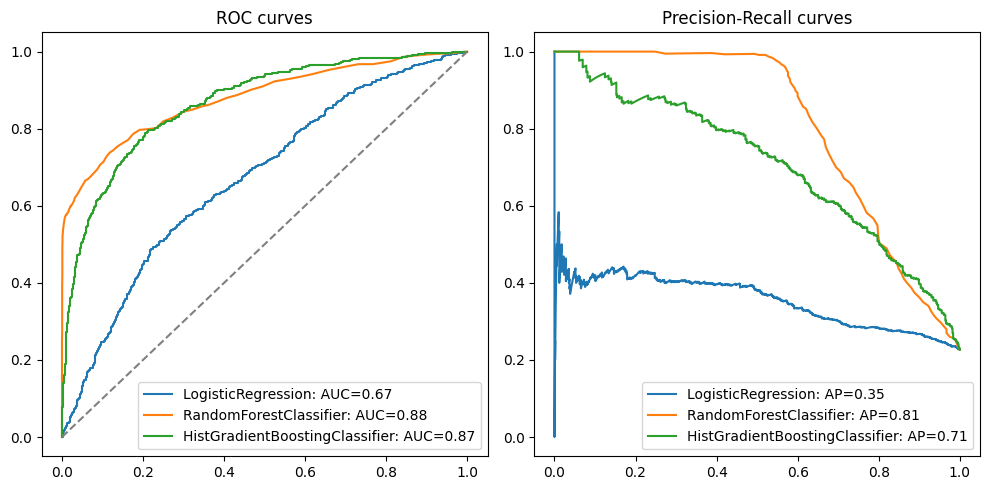

In [ ]:
baseline_names, baseline_aucs, baseline_aps = plot_performance([lr,rf,gb],X_test,y_test)

In [ ]:
def result_table(models, aucs, aps):
  return round(pd.DataFrame({'model':models,'AUC':aucs,'AP':aps}),3)

In [ ]:
result_table(baseline_names, baseline_aucs, baseline_aps)

,model,AUC,AP
0,LogisticRegression,0.671,0.355
1,RandomForestClassifier,0.880,0.807
2,HistGradientBoostingClassifier,0.866,0.706


In [ ]:
# strategy 1: add weights with more to the minority class (positive class)
n0, n1 = y_train.value_counts().values
weights = np.where(y_train==1, len(y_train)/(2*n1), len(y_train)/(2*n0))

In [ ]:
# retrain all 3
lr_weighted = LogisticRegression()
lr_weighted.fit(X_train, y_train, sample_weight=weights)
lr_weighted_probs = lr_weighted.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,lr_weighted_probs)}")
print(f"AP: {average_precision_score(y_test, lr_weighted_probs)}")

AUC: 0.672875637252537
AP: 0.3501383725402582


In [ ]:
rf_wei = RandomForestClassifier(random_state=2111)
rf_wei.fit(X_train, y_train, sample_weight=weights)
rf_wei_probs = rf_wei.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,rf_wei_probs)}")
print(f"AP: {average_precision_score(y_test, rf_wei_probs)}")

AUC: 0.8841501423264342
AP: 0.8057182066657134


In [ ]:
gb_wei = HistGradientBoostingClassifier(random_state=2111)
gb_wei.fit(X_train, y_train, sample_weight=weights)
gb_wei_probs = gb_wei.predict_proba(X_test)[:,1]
print(f"AUC: {roc_auc_score(y_test,gb_wei_probs)}")
print(f"AP: {average_precision_score(y_test, gb_wei_probs)}")

AUC: 0.8686891494186327
AP: 0.699979547882644


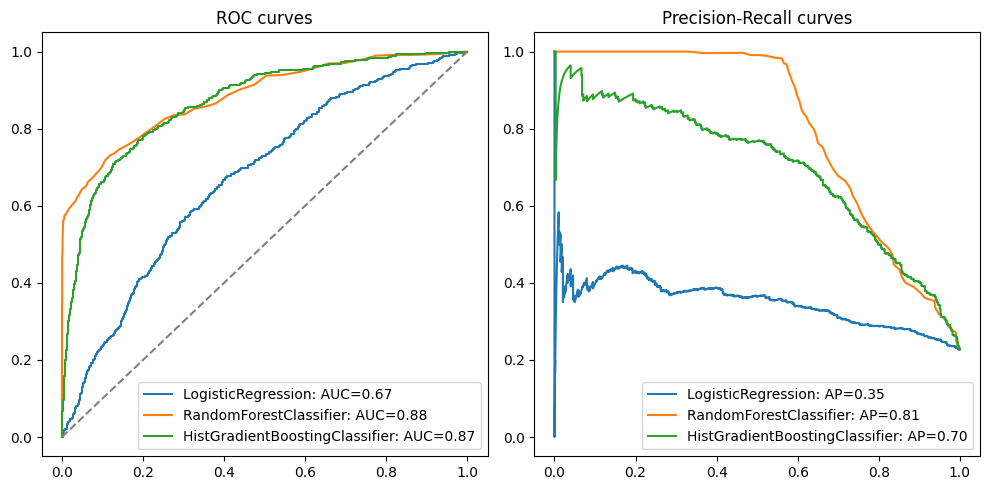

In [ ]:
wei_names, wei_aucs, wei_aps = plot_performance([lr_weighted,rf_wei,gb_wei],X_test,y_test)
# assumes similar shape but actually different threshold distribution

In [ ]:
result_table(wei_names, wei_aucs, wei_aps)

,model,AUC,AP
0,LogisticRegression,0.673,0.350
1,RandomForestClassifier,0.884,0.806
2,HistGradientBoostingClassifier,0.869,0.700


In [ ]:
# REWRITE
def threshold_plot(y_true, y_probs, ax, threshold_step=0.1):
  from matplotlib.cm import viridis as mycolormap
  auc = roc_auc_score(y_true, y_probs)
  fpr, tpr, thresh = roc_curve(y_true, y_probs)
# x axis, y axis
  x = fpr
  y = tpr

  auc = roc_auc_score(y_true, y_probs)

  # color
  c = thresh
  c[0] = c[0]-1
  c = (c - c.min())/(c.max() - c.min())

  base = 1.0 - threshold_step
  for i in range(len(x)):
      ax.plot(x[i:i+2], y[i:i+2], c=mycolormap(c[i]))

      if thresh[i] <= base:
          ax.scatter(x[i], y[i], color=mycolormap(c[i]))
          ax.annotate("  {0:.1f}".format(thresh[i]), (x[i]*1.03, y[i]*0.96), fontsize=8)
          base -= threshold_step

  ax.annotate("AUC = {0:.2f}".format(auc), (0.77, 0.01), fontsize=8,
              bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
  ax.set_xlabel("FPR")
  ax.set_ylabel("TPR")

  return

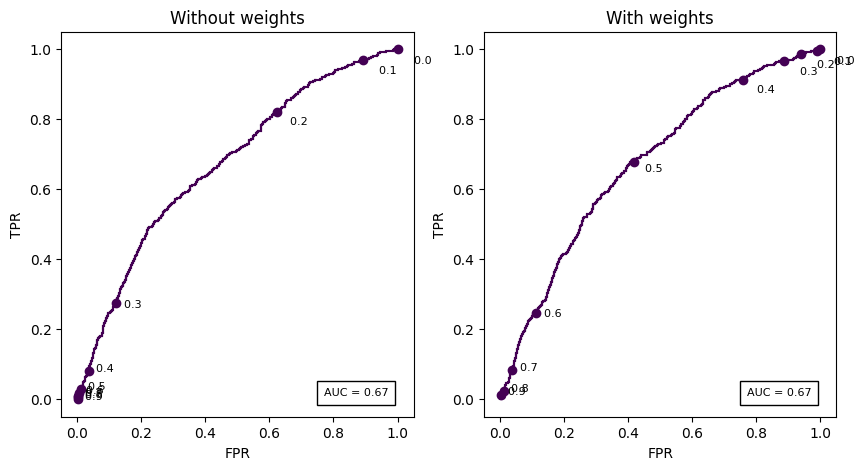

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# without weights
threshold_plot(y_test, lr_probs, ax[0])
ax[0].set_title("Without weights")

# with weights
threshold_plot(y_test, lr_weighted_probs, ax[1])
ax[1].set_title("With weights")

plt.show()

# is this shift in distribution good or bad?

In [ ]:
!pip install imbalance-xgboost -q

In [ ]:
# strategy 2: change loss function to focal loss
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
xgb = imb_xgb(special_objective='focal',focal_gamma=1.0, eta=0.1, num_round=100, imbalance_alpha=0.5)
xgb.fit(X_train.values, y_train.values)
xgb_probs = xgb.predict_sigmoid(X_test)
print(f"AUC: {roc_auc_score(y_test,xgb_probs)}")
print(f"AP: {average_precision_score(y_test, xgb_probs)}")

AUC: 0.8589556295331371
AP: 0.7428328399553056


In [ ]:
!pip install Boruta -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
# examine lift using the predicted scores from xgb
lift_df = X_test.copy()
lift_df['prob_default'] = xgb_probs
lift_df['y_actual'] = y_test
lift_df.head()

,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,...,identificationtype_IDENTITY_IN_HOUSE,identificationtype_IDENTITY_IN_STREET,identificationtype_IDENTITY_IN_UNIVERSE,identificationtype_LASTNAME_IN_HOUSE,identificationtype_NOT_IDENTIFIED,score_partialdecision_GREEN,score_partialdecision_RED,score_partialdecision_YELLOW,prob_default,y_actual
7579,0,1000,160.85,0.0,0.0,0.0,0.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.054929,0
2406,0,300,0.00,0.0,0.0,0.0,0.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.198588,0
6061,1,3000,482.54,0.0,0.0,0.0,30.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.093265,0
8954,0,1500,241.27,0.0,0.0,0.0,0.0,1,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.054208,0
8183,1,2700,434.29,0.0,25.8,1.0,30.0,1,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.080753,0


In [ ]:
lift_df = lift_df.sort_values(by='prob_default',ascending=True)
lift_df['cum_default'] = lift_df['y_actual'].cumsum()

In [ ]:
lift_df['lift'] = lift_df['cum_default']/lift_df['cum_default'].iloc[-1]

In [ ]:
lift_df.reset_index(inplace=True)

In [ ]:
lift_df.rename(columns={'index':'index_id'},inplace=True)

In [ ]:
perfect_lift = lift_df.sort_values(by='y_actual',ascending=True)
perfect_lift['cum_default'] = perfect_lift['y_actual'].cumsum()
perfect_lift['lift'] = perfect_lift['cum_default']/perfect_lift['cum_default'].iloc[-1]

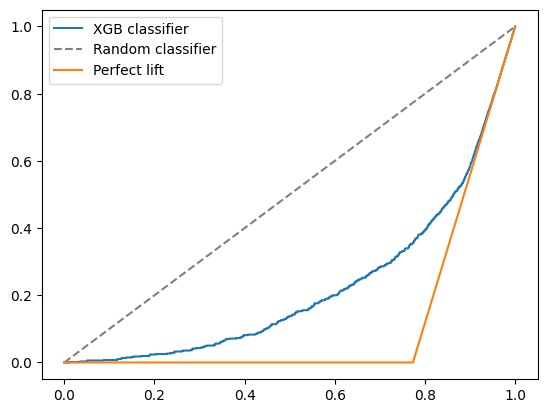

In [ ]:
plt.plot(lift_df.index.values/lift_df.index.values.max(),lift_df['lift'],label='XGB classifier')
plt.plot([0,1],linestyle='--',color='gray',label='Random classifier')
plt.plot(lift_df.index.values/lift_df.index.values.max(),perfect_lift['lift'],label='Perfect lift')
plt.legend();

In [ ]:
# rf_lift
rf_lift = X_test.copy()
rf_lift['y_actual'] = y_test
rf_lift['prob_default'] = rf_wei_probs
rf_lift = rf_lift.sort_values(by='prob_default', ascending=True)
rf_lift['cum_default'] = rf_lift['y_actual'].cumsum()
rf_lift['lift'] = rf_lift['cum_default']/rf_lift['cum_default'].iloc[-1]

In [ ]:
rf_lift.reset_index(drop=True,inplace=True)

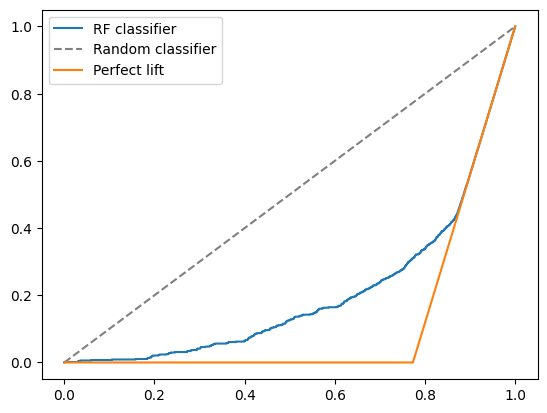

In [ ]:
plt.plot(rf_lift.index.values/rf_lift.index.values.max(),rf_lift['lift'],label='RF classifier')
plt.plot([0,1],linestyle='--',color='gray',label='Random classifier')
plt.plot(lift_df.index.values/lift_df.index.values.max(),perfect_lift['lift'],label='Perfect lift')
plt.legend();

In [ ]:
# strategy 3: feature selection
from boruta import BorutaPy
borutor = BorutaPy(estimator=RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=-1), n_estimators='auto',
                                                    perc=100,alpha=0.05,max_iter=100,random_state=2111,verbose=0)
borutor.fit(X_train.values, y_train.values)


BorutaPy(estimator=RandomForestClassifier(max_depth=7, n_estimators=134,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x79B4AA21C340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x79B4AA21C340)

In [ ]:
keep_cols = sorted(np.array(X_train.columns)[borutor.support_.tolist()])

In [ ]:
# drop highly correlated columns - REWRITE
def drop_correlated(df, threshold=0.95):
  corr_matrix = df.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
  return df.drop(to_drop,axis=1).columns

In [ ]:
remain_cols = drop_correlated(X_train).values

In [ ]:
remain_cols.shape[0]/X_train.shape[1]

0.8084112149532711

In [ ]:
keep_cols = [col for col in keep_cols if col in remain_cols]

In [ ]:
keep_cols

['applicationamount',
 'applicationprice',
 'averagepaiddebt',
 'averagepaymenttimeindays',
 'correspondence_address_different_pesel_count_p0_360',
 'countrejectedapplications',
 'customerincomecurrent',
 'diff_customerincome',
 'income_charge',
 'masterriskstatus_no_negative_history',
 'paidobligationscount',
 'providerscount',
 'score',
 'sumpaiddebt',
 'swo_ind_loans_amount_p0_210',
 'swo_ind_loans_amount_p0_30',
 'swo_ind_loans_amount_p0_7',
 'swo_ind_loans_amount_p0_90',
 'swo_ind_loans_amount_p0_plus',
 'swo_ind_loans_number_p0_210',
 'swo_ind_loans_number_p0_90',
 'swo_ind_loans_number_p0_plus',
 'swo_ind_same_main_address_different_pesel_count_p0_360',
 'swo_ind_same_pesel_applications_count_p0_210',
 'swo_ind_same_pesel_applications_count_p0_3',
 'swo_ind_same_pesel_applications_count_p0_30',
 'swo_ind_same_pesel_applications_count_p0_360',
 'swo_ind_same_pesel_applications_count_p0_7',
 'swo_ind_same_pesel_applications_count_p0_90',
 'swo_ind_same_pesel_different_lender_count

In [ ]:
# retrain using weights and only these cols
lr_boruta = LogisticRegression()
lr_boruta.fit(X_train[keep_cols], y_train, sample_weight=weights)
lr_boruta_probs = lr_boruta.predict_proba(X_test[keep_cols])[:,1]
print(f"AUC: {roc_auc_score(y_test,lr_boruta_probs)}")
print(f"AP: {average_precision_score(y_test, lr_boruta_probs)}")

AUC: 0.6635801933066371
AP: 0.3355315799795845


In [ ]:
rf_boruta = RandomForestClassifier(random_state=2111)
rf_boruta.fit(X_train[keep_cols], y_train, sample_weight=weights)
rf_boruta_probs = rf_boruta.predict_proba(X_test[keep_cols])[:,1]
print(f"AUC: {roc_auc_score(y_test,rf_boruta_probs)}")
print(f"AP: {average_precision_score(y_test, rf_boruta_probs)}")

AUC: 0.8804695968221805
AP: 0.804848926829322


In [ ]:
gb_boruta = HistGradientBoostingClassifier(random_state=2111)
gb_boruta.fit(X_train[keep_cols], y_train, sample_weight=weights)
gb_boruta_probs = gb_boruta.predict_proba(X_test[keep_cols])[:,1]
print(f"AUC: {roc_auc_score(y_test,gb_boruta_probs)}")
print(f"AP: {average_precision_score(y_test, gb_boruta_probs)}")

AUC: 0.8619263118959166
AP: 0.682859897480779


In [ ]:
# ToDos: best practices show that better to undersample the majority class first then use weight to select features via Boruta
# lift only cares about the ordering between classes and not intraclass => examine other metrics to have a more comprehensive picture
# model interpretability - SHAP
# model tuning, hyperparam search
# probability calibration